<a href="https://colab.research.google.com/github/weltonlopesdev/Algoritimo-de-Clusteriza-o-KMeans/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings("ignore")

Carregamento dos dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv', delimiter='\t')

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Analise exploratória e limpeza

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

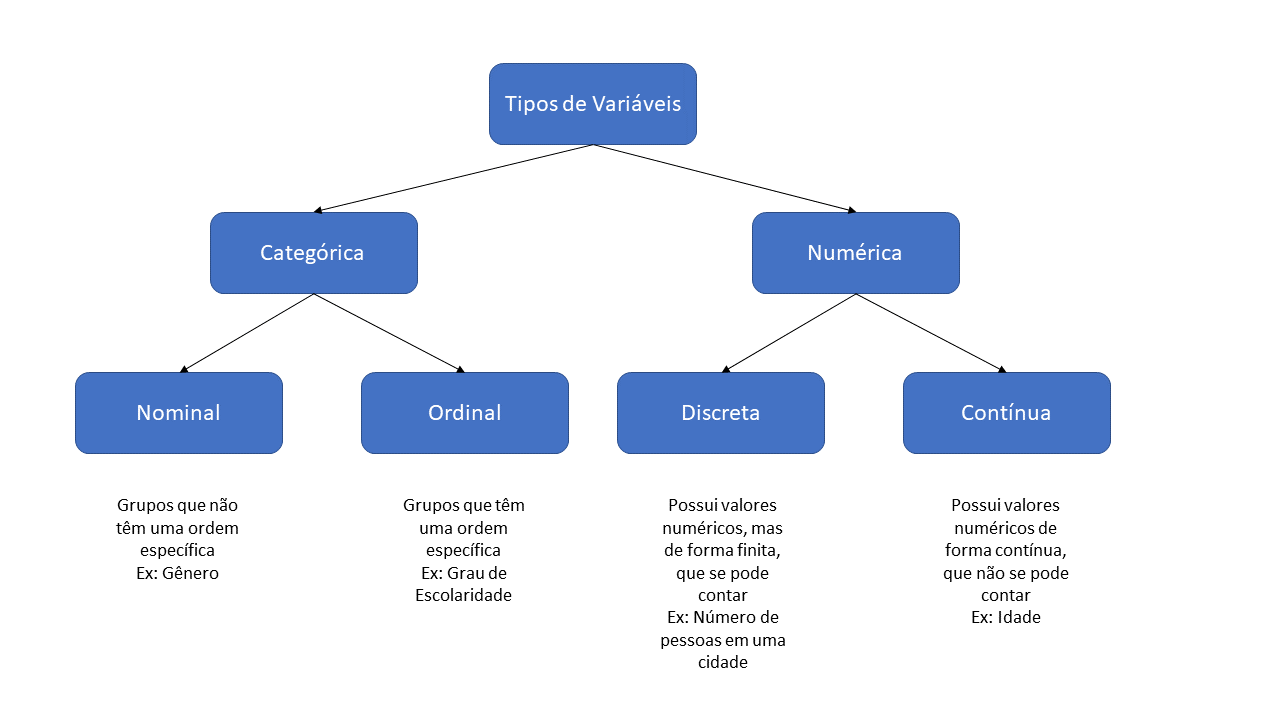

In [ ]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Tipos+de+Variáveis.png', width=900, height=600)

Funções para analise

In [ ]:
def show_null(df): #função para mostrar os dados null
  null_columns = (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False).index #somar todos os nulos do dataframe no eixo 0 de forma crescente
 
  null_data = pd.concat([df.isnull().sum(axis=0), #todos os valores nulos das colunas
                         (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False), #pegar as porcentagens nulas
                         df.loc[:, df.columns.isin(list(null_columns))].dtypes], axis=1) #pegar os tipos
                         
  null_data = null_data.rename(columns={0: '#', 1: '% null', 2: 'type'}).sort_values(ascending=False, by='% null') #Dando nomes a coluna com rename

  return null_data





In [ ]:
show_null(df)  #chamada da função

,#,% null,type
Income,24,0.010714,float64
ID,0,0.000000,int64
NumDealsPurchases,0,0.000000,int64
Z_Revenue,0,0.000000,int64
Z_CostContact,0,0.000000,int64
Complain,0,0.000000,int64
AcceptedCmp2,0,0.000000,int64
AcceptedCmp1,0,0.000000,int64
AcceptedCmp5,0,0.000000,int64
AcceptedCmp4,0,0.000000,int64


In [ ]:
def plot_num(df, feature):#plotando uma variavel numerica
  fig = plt.figure(figsize=(12,8))
  gs = GridSpec(1,2)
  sns.boxplot(y=feature, data=df, color='firebrick', ax=fig.add_subplot(gs[0,0]))
  plt.ylabel(feature)
  sns.stripplot(y=df[feature], color='darkcyan', ax=fig.add_subplot(gs[0,1]))
  plt.ylabel(None)
  plt.show()

 


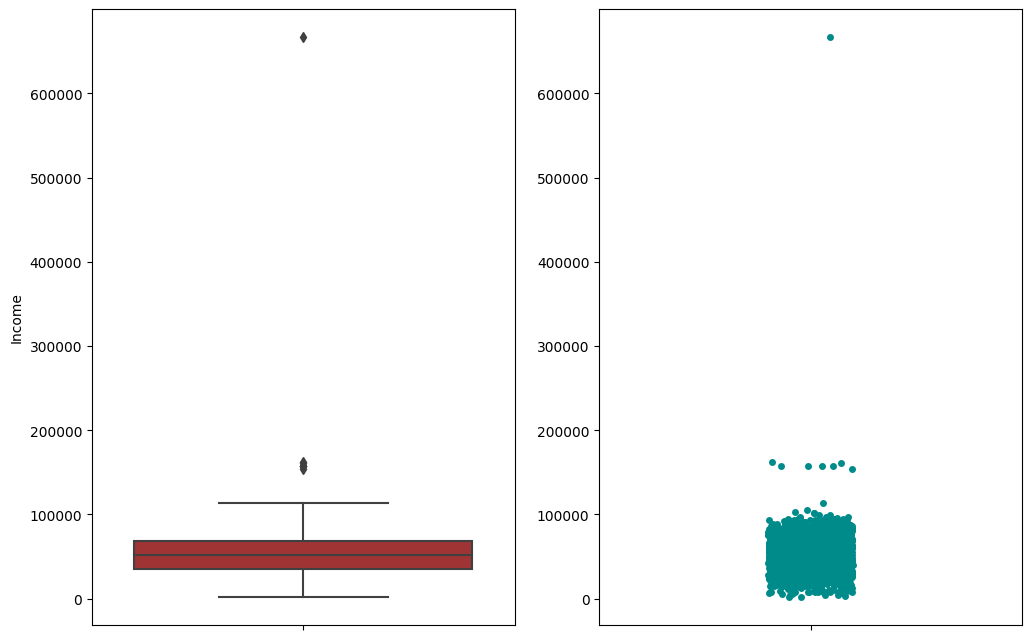

In [ ]:
plot_num(df, 'Income')

In [ ]:
def plot_cat(df, feature):#platando uma variavel categorica
  fig = plt.figure(figsize=(12,8))
  ax = sns.countplot(data=df, x=feature)

  plt.xlabel(feature)
  plt.ylabel('Quantidade de Clientes')
  plt.show()

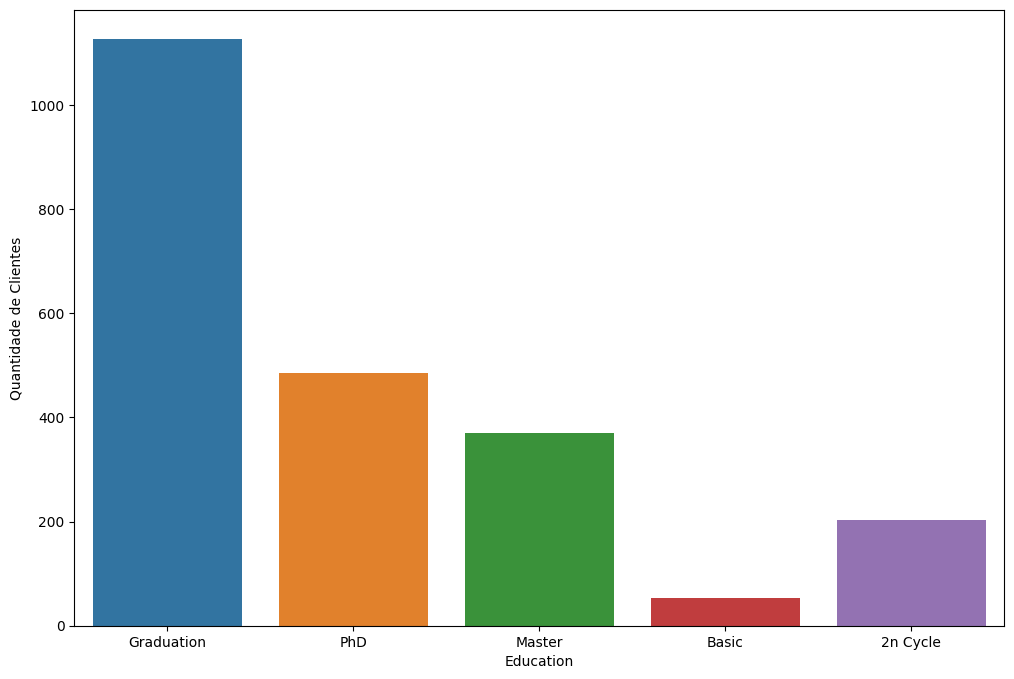

In [ ]:
plot_cat(df, 'Education')

Variavel People

In [ ]:
people = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']]

In [ ]:
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [ ]:
show_null(people) #Verificando se dentro do dataframe possui nulos

,#,% null,type
Income,24,0.010714,float64
ID,0,0.000000,int64
Year_Birth,0,0.000000,int64
Education,0,0.000000,object
Marital_Status,0,0.000000,object
Kidhome,0,0.000000,int64
Teenhome,0,0.000000,int64
Dt_Customer,0,0.000000,object
Recency,0,0.000000,int64
Complain,0,0.000000,int64


Variavel Income

In [ ]:
people.dropna(inplace=True)

In [ ]:
show_null(people) #aqui já dropamos os valores nullos

,#,% null,type
ID,0,0.0,int64
Year_Birth,0,0.0,int64
Education,0,0.0,object
Marital_Status,0,0.0,object
Income,0,0.0,float64
Kidhome,0,0.0,int64
Teenhome,0,0.0,int64
Dt_Customer,0,0.0,object
Recency,0,0.0,int64
Complain,0,0.0,int64


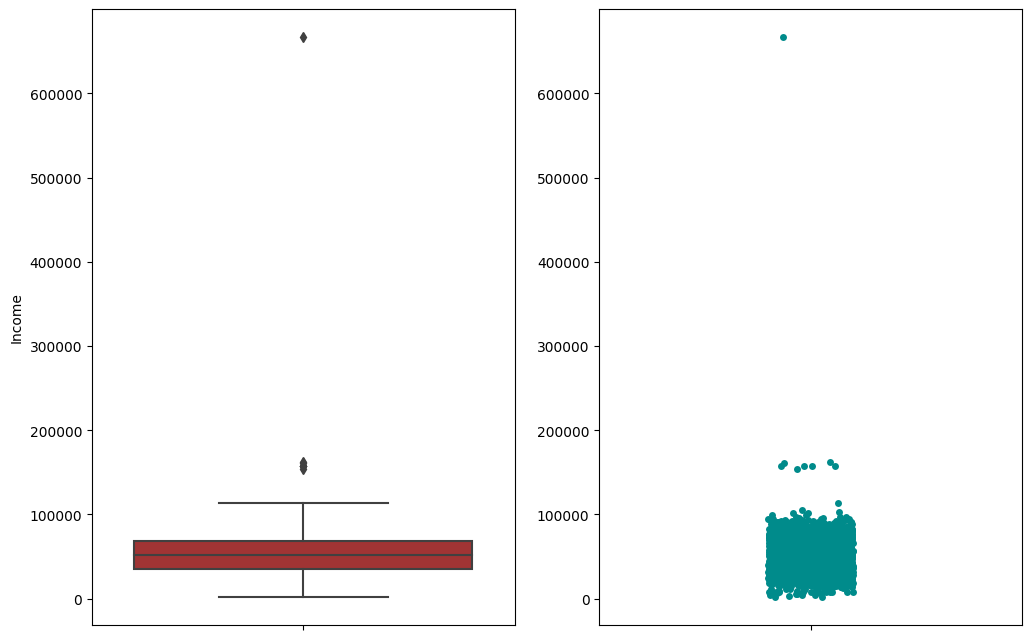

In [ ]:
plot_num(people, 'Income') #plotando coluna income

In [ ]:
people = people[people.Income < 200000] 

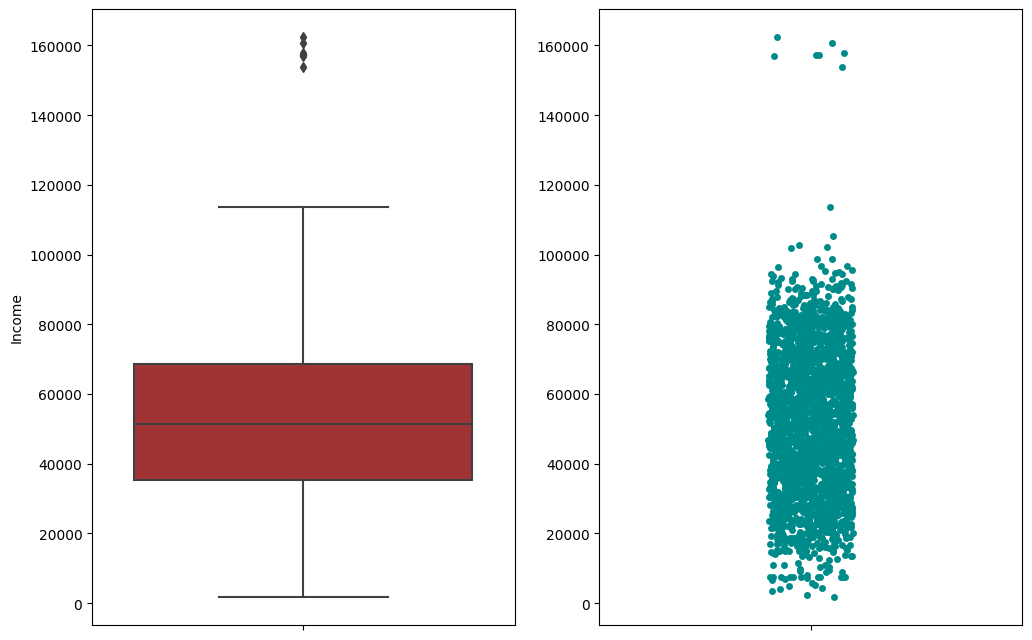

In [ ]:
plot_num(people, 'Income')  #plotando coluna income

Variavel Year_Birth

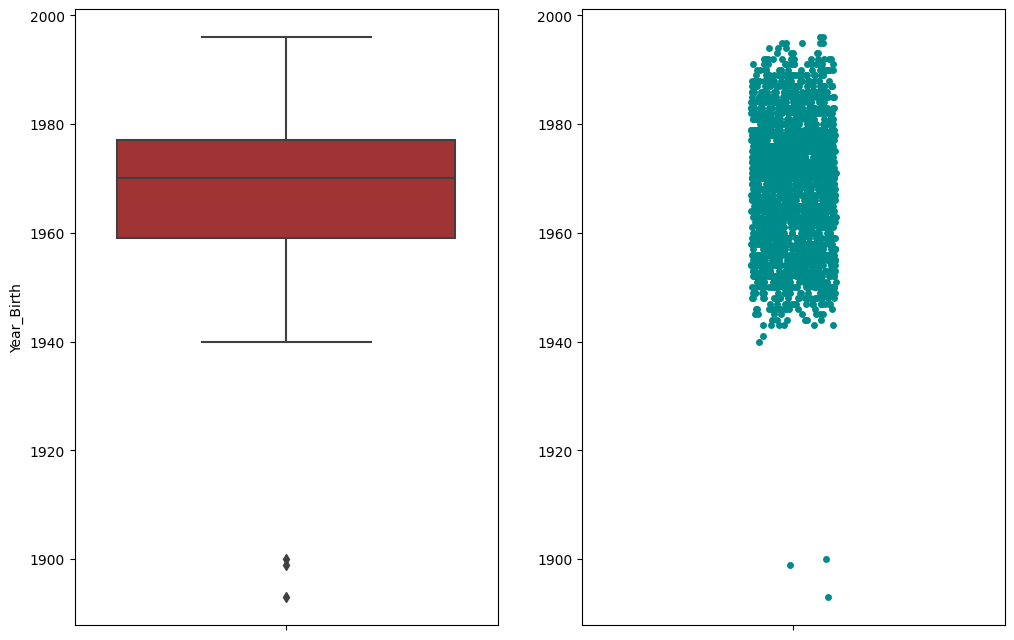

In [ ]:
plot_num(people, 'Year_Birth')

In [ ]:
people = people[people.Year_Birth > 1930]

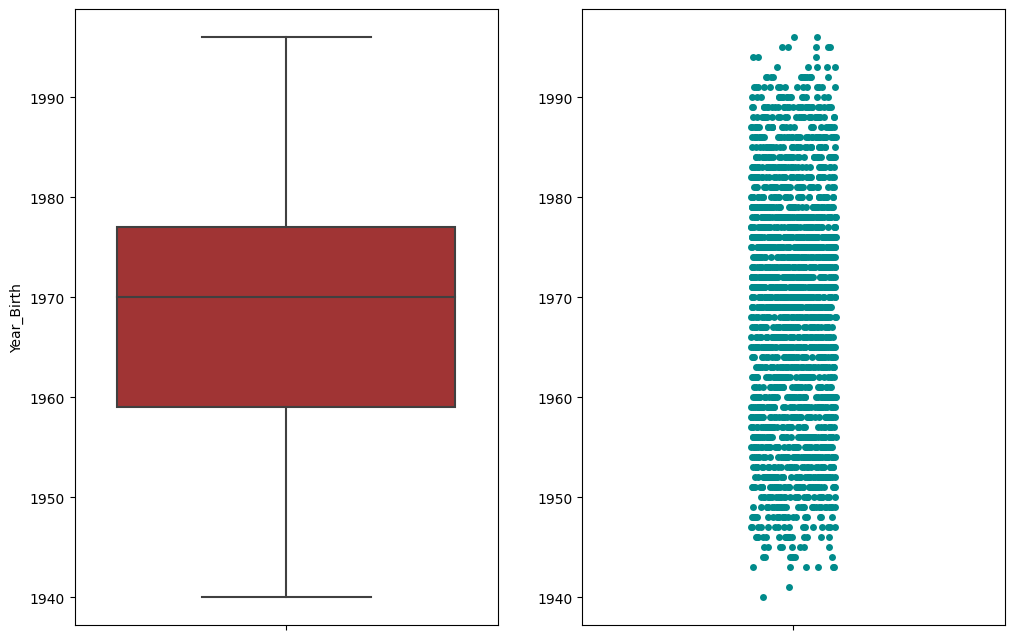

In [ ]:
plot_num(people, 'Year_Birth')

Variavel Education

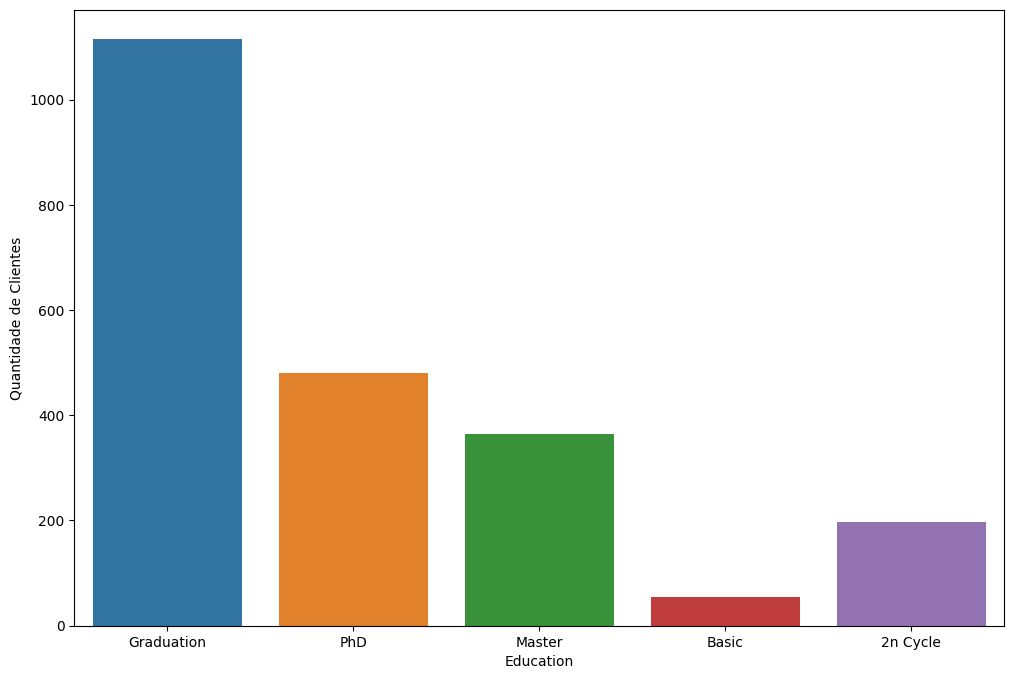

In [ ]:
plot_cat(people, 'Education') #aqui plot cat pois education é uma var categorica

In [ ]:
people.Education = people.Education.apply(lambda x: 0 if x=='Basic' 
                       else(1 if x=='2n Cycle' 
                            else(2 if x=='Graduation' 
                                 else(3 if x=='Master' 
                                      else(4 if x=='PhD' else None)))))

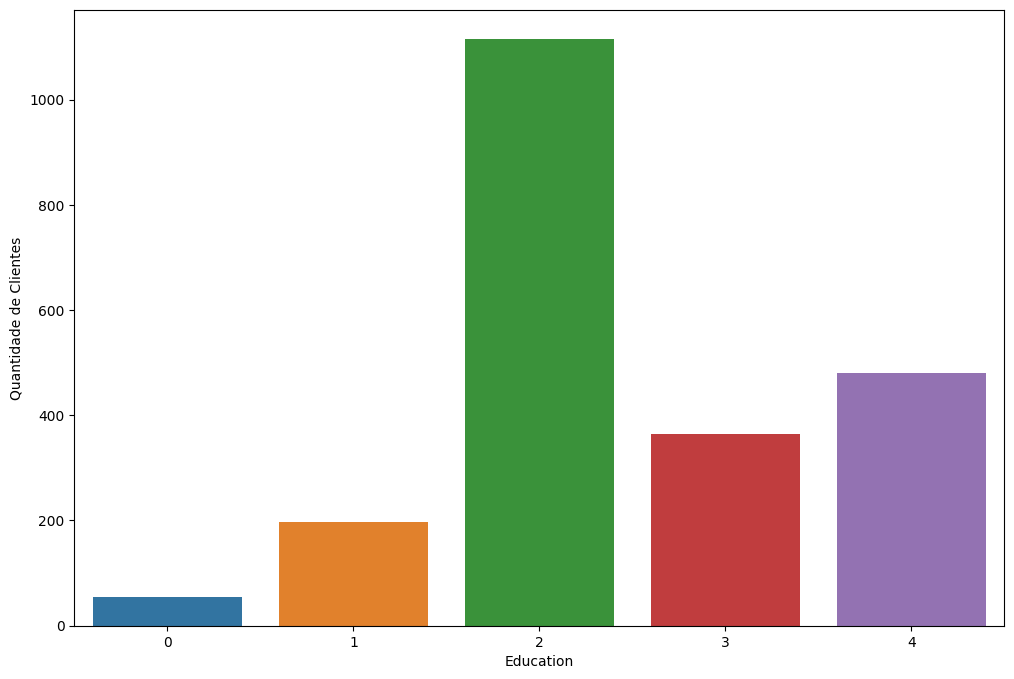

In [ ]:
plot_cat(people, 'Education')

Variavel Marital_status

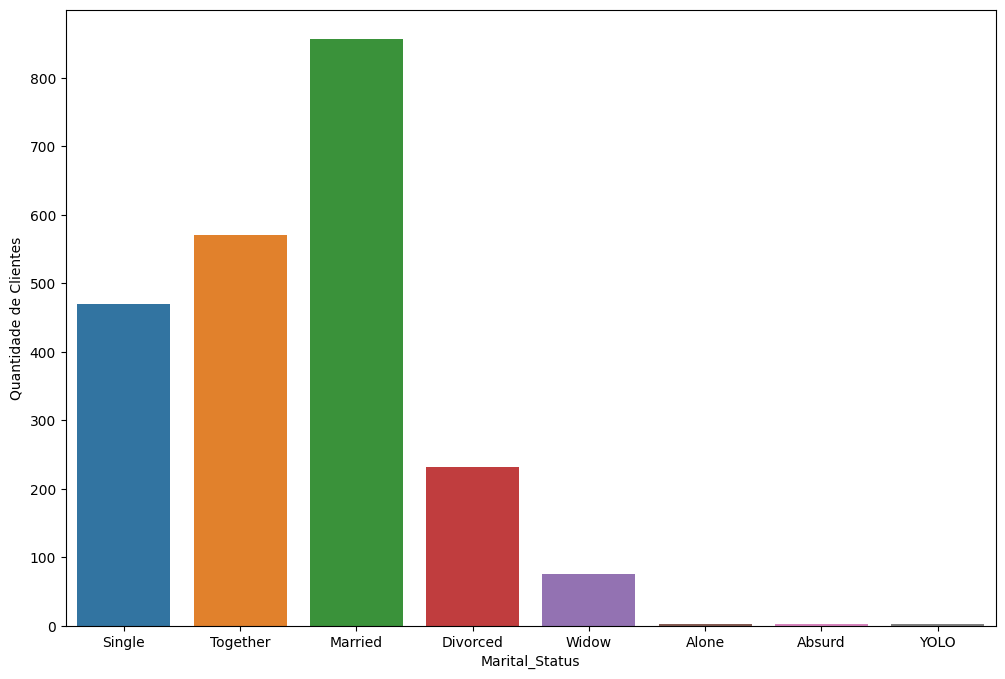

In [ ]:
plot_cat(people, 'Marital_Status')

In [ ]:
people = people[people.Marital_Status != 'Absurd']

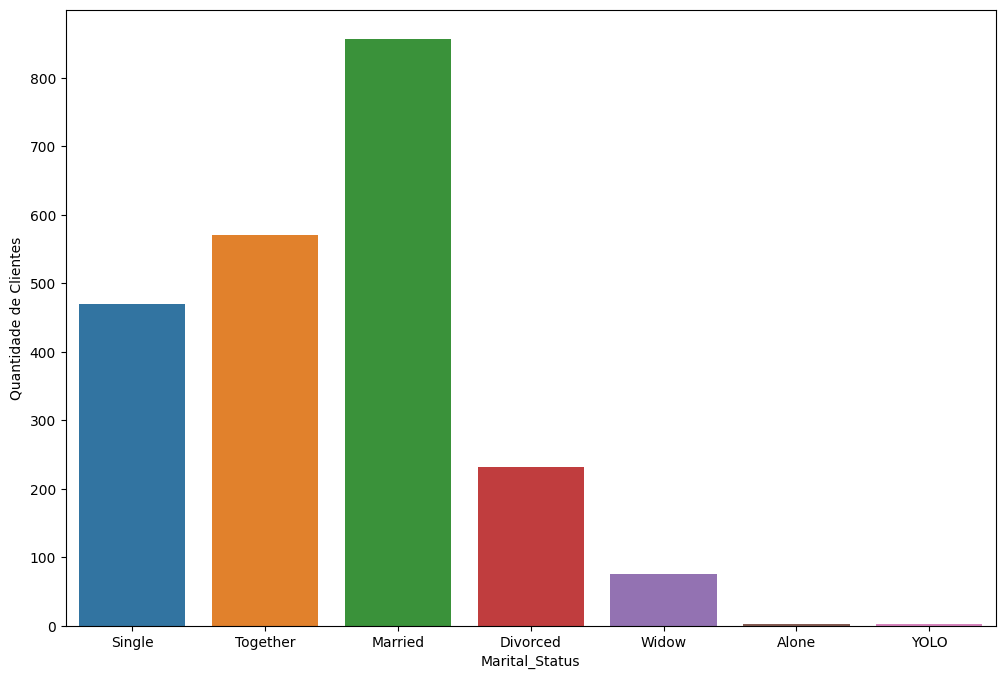

In [ ]:
plot_cat(people, 'Marital_Status')

In [ ]:
people.Marital_Status.apply(lambda x: 'Single' if x=='Alone' else('Single' if x=='YOLO' else x))

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2210, dtype: object

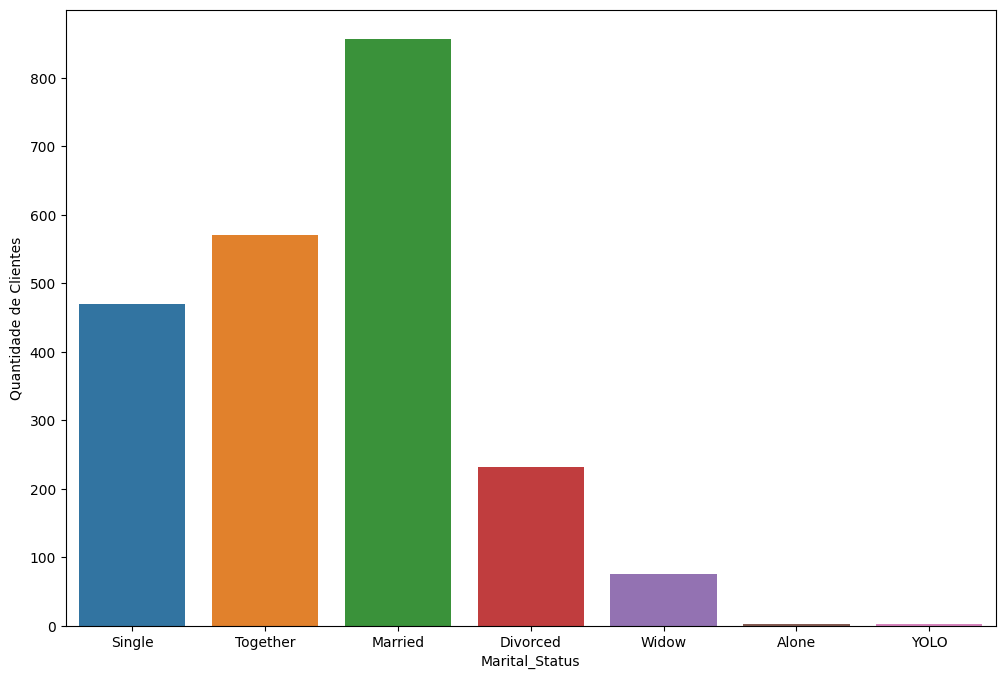

In [ ]:
plot_cat(people, 'Marital_Status')

In [ ]:
people = people[people.Marital_Status != 'Alone']
people = people[people.Marital_Status != 'YOLO']

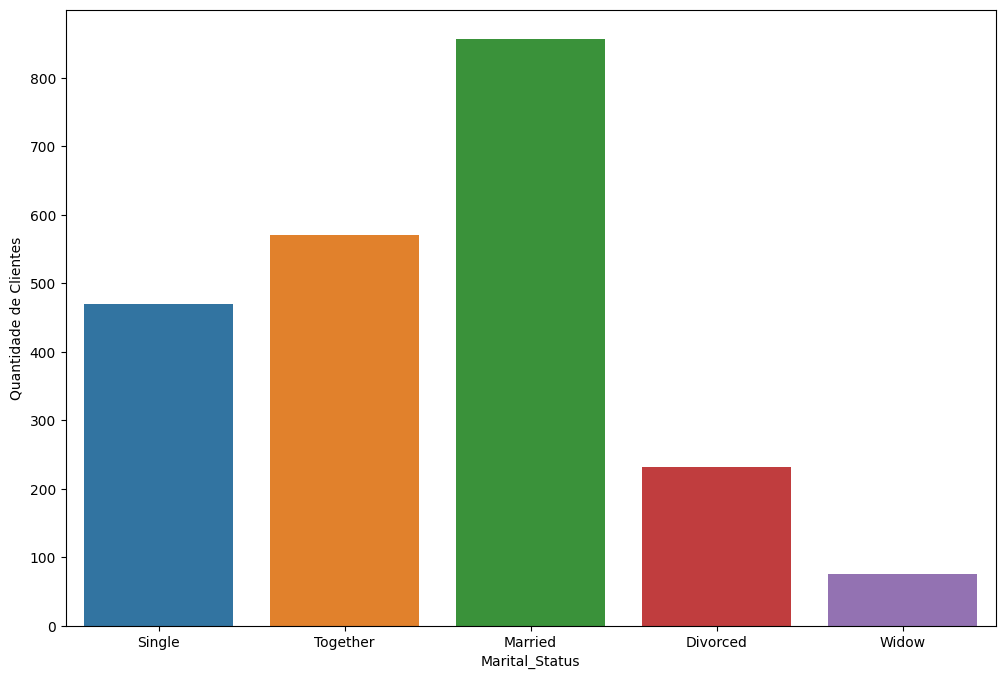

In [ ]:
plot_cat(people, 'Marital_Status')

In [ ]:
people.Marital_Status.apply(lambda x: 'Together' if x=='Married' else x)

0         Single
1         Single
2       Together
3       Together
4       Together
          ...   
2235    Together
2236    Together
2237    Divorced
2238    Together
2239    Together
Name: Marital_Status, Length: 2205, dtype: object

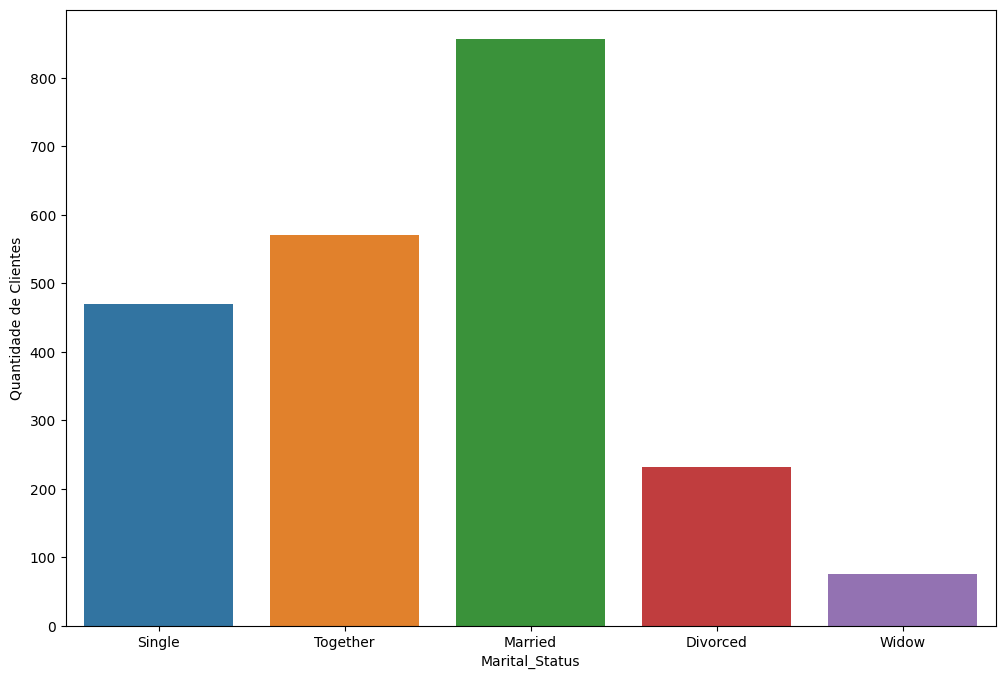

In [ ]:
plot_cat(people, 'Marital_Status')

In [ ]:
people.Dt_Customer = pd.to_datetime(people.Dt_Customer, dayfirst=True)

In [ ]:
people = pd.get_dummies(people)

In [ ]:
people

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,2,58138.0,0,0,2012-09-04,58,0,0,0,1,0,0
1,2174,1954,2,46344.0,1,1,2014-03-08,38,0,0,0,1,0,0
2,4141,1965,2,71613.0,0,0,2013-08-21,26,0,0,0,0,1,0
3,6182,1984,2,26646.0,1,0,2014-02-10,26,0,0,0,0,1,0
4,5324,1981,4,58293.0,1,0,2014-01-19,94,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,61223.0,0,1,2013-06-13,46,0,0,1,0,0,0
2236,4001,1946,4,64014.0,2,1,2014-06-10,56,0,0,0,0,1,0
2237,7270,1981,2,56981.0,0,0,2014-01-25,91,0,1,0,0,0,0
2238,8235,1956,3,69245.0,0,1,2014-01-24,8,0,0,0,0,1,0


Variavel KidHome

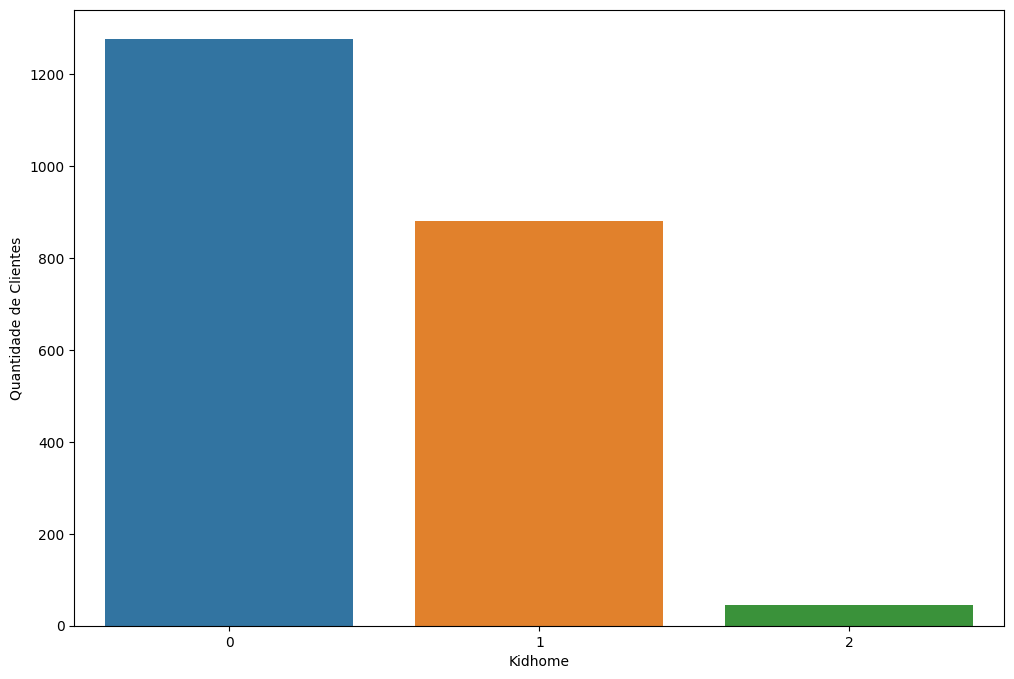

In [ ]:
plot_cat(people, 'Kidhome')

Variavel Teenhome

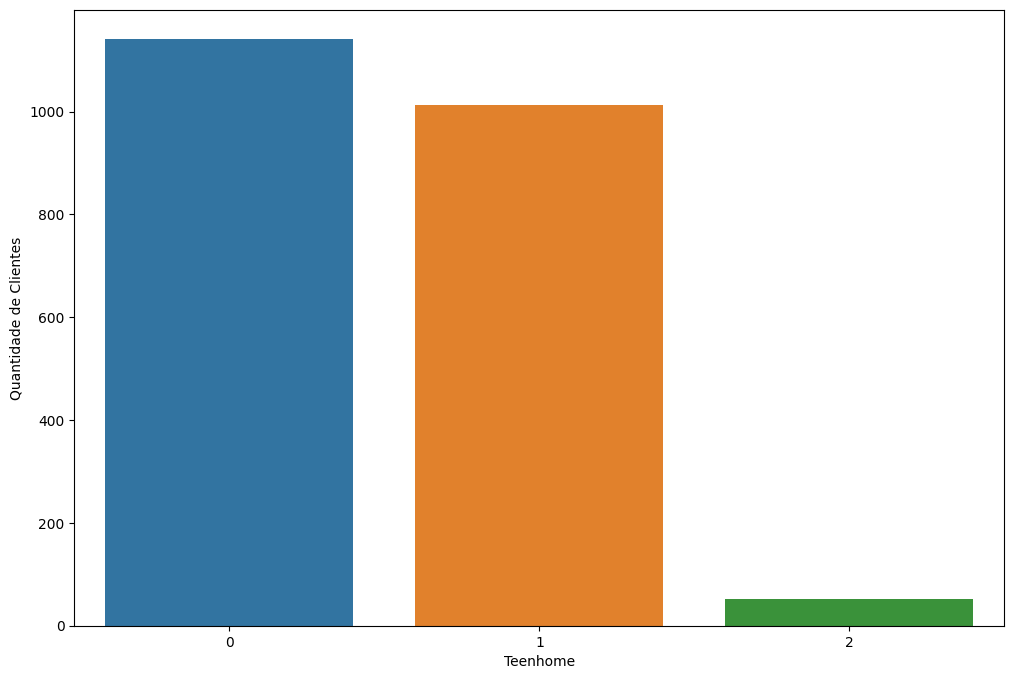

In [ ]:
plot_cat(people, 'Teenhome')

Juntando kidhome + teenhome

In [ ]:
people['ChildrenHome'] = people.Kidhome + people.Teenhome

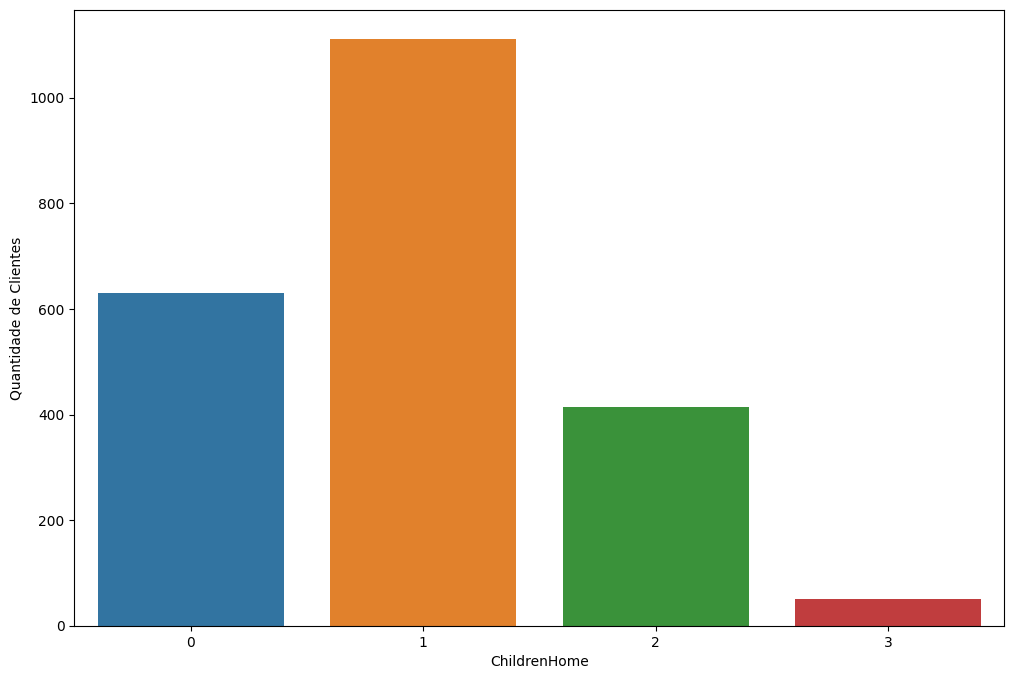

In [ ]:
plot_cat(people, 'ChildrenHome')

In [ ]:
people.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

In [ ]:
people.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,Complain,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome
0,5524,1957,2,58138.0,2012-09-04,58,0,0,0,1,0,0,0
1,2174,1954,2,46344.0,2014-03-08,38,0,0,0,1,0,0,2
2,4141,1965,2,71613.0,2013-08-21,26,0,0,0,0,1,0,0
3,6182,1984,2,26646.0,2014-02-10,26,0,0,0,0,1,0,1
4,5324,1981,4,58293.0,2014-01-19,94,0,0,1,0,0,0,1


Variavel DT_customer

In [ ]:
people.Dt_Customer.min()

Timestamp('2012-07-30 00:00:00')

In [ ]:
people.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

In [ ]:
people['Dt_Customer'] + pd.to_timedelta(people['Recency'], unit='d')

0      2012-11-01
1      2014-04-15
2      2013-09-16
3      2014-03-08
4      2014-04-23
          ...    
2235   2013-07-29
2236   2014-08-05
2237   2014-04-26
2238   2014-02-01
2239   2012-11-24
Length: 2205, dtype: datetime64[ns]

In [ ]:
(people['Dt_Customer'] + pd.to_timedelta(people['Recency'], unit='d')).max()

Timestamp('2014-10-04 00:00:00')

In [ ]:
people['LifeTime'] = (pd.to_datetime('2014-10-05') - people['Dt_Customer']).dt.days/30

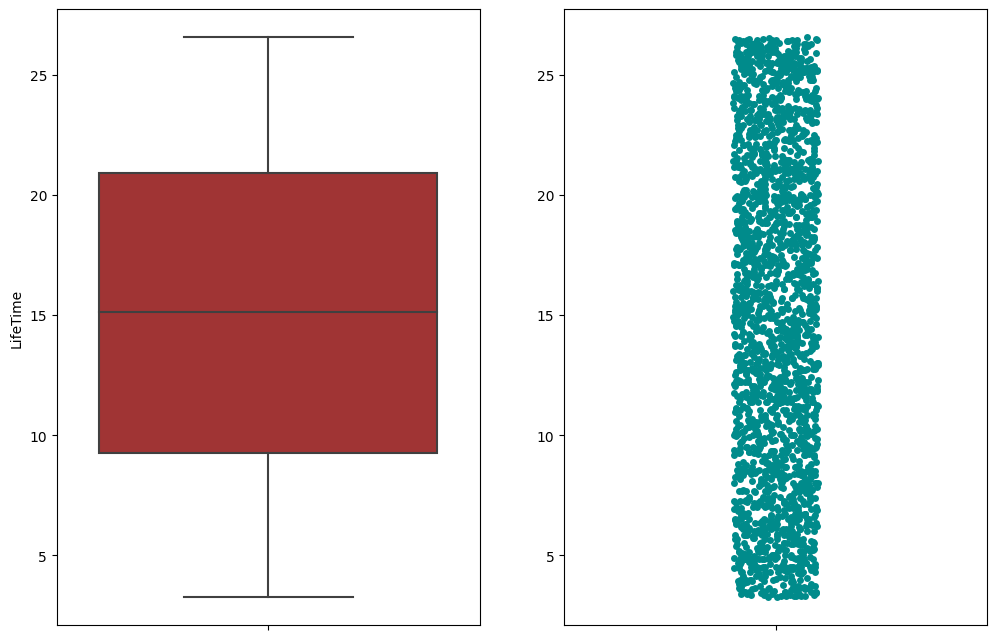

In [ ]:
plot_num(people, 'LifeTime')

Variavel recency

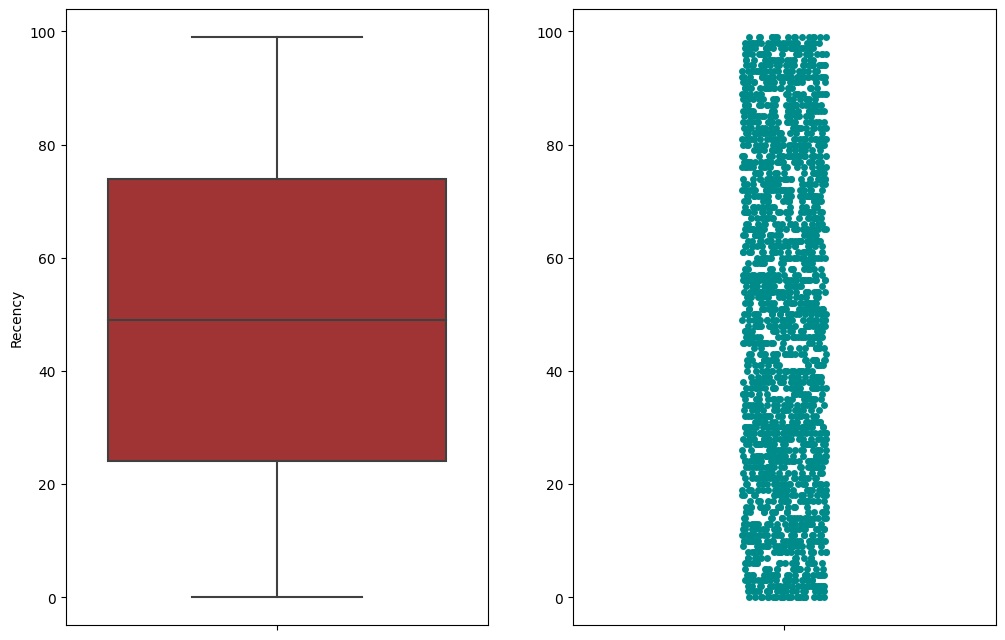

In [ ]:
plot_num(people, 'Recency')

Variavel Complain

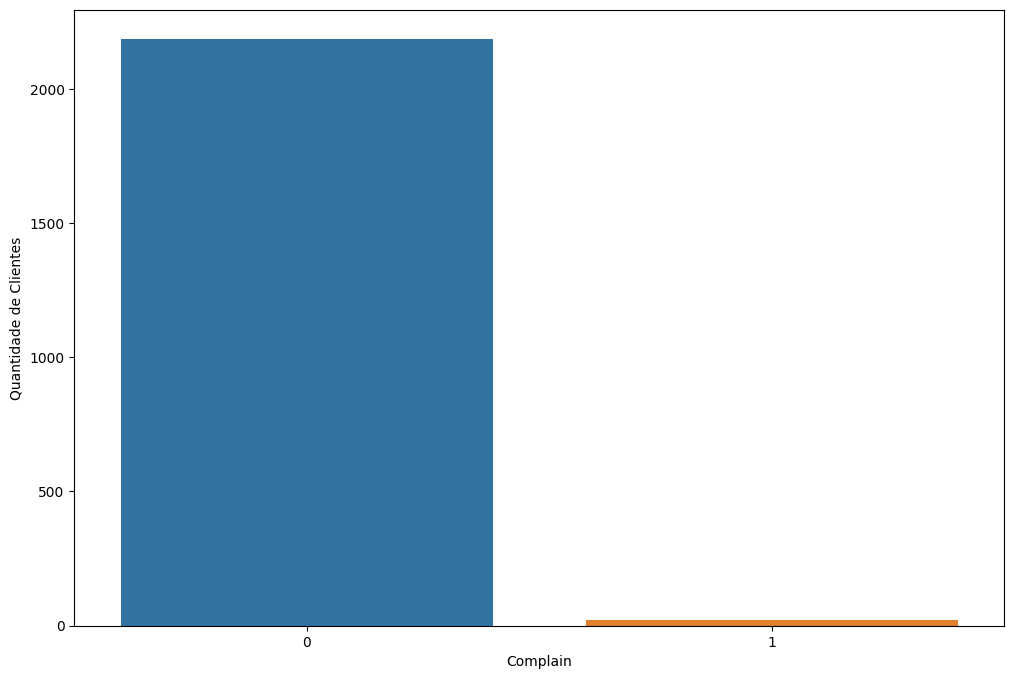

In [ ]:
plot_cat(people, 'Complain')

In [ ]:
people.drop(columns=['Complain'], inplace=True)

In [ ]:
people.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,LifeTime
0,5524,1957,2,58138.0,2012-09-04,58,0,0,1,0,0,0,25.366667
1,2174,1954,2,46344.0,2014-03-08,38,0,0,1,0,0,2,7.033333
2,4141,1965,2,71613.0,2013-08-21,26,0,0,0,1,0,0,13.666667
3,6182,1984,2,26646.0,2014-02-10,26,0,0,0,1,0,1,7.900000
4,5324,1981,4,58293.0,2014-01-19,94,0,1,0,0,0,1,8.633333


In [ ]:
people.drop(columns=['Dt_Customer'], inplace=True)

Products

In [ ]:
products = df[['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [ ]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


In [ ]:
show_null(products)

,#,% null,type
ID,0,0.0,int64
MntWines,0,0.0,int64
MntFruits,0,0.0,int64
MntMeatProducts,0,0.0,int64
MntFishProducts,0,0.0,int64
MntSweetProducts,0,0.0,int64
MntGoldProds,0,0.0,int64


Explorando dados ds vars em products

In [ ]:
#plot_num(people, 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')

In [ ]:
products['TotalAmountSpent'] = products.MntWines + products.MntSweetProducts \
 + products.MntMeatProducts + products.MntGoldProds + products.MntFruits + products.MntFishProducts

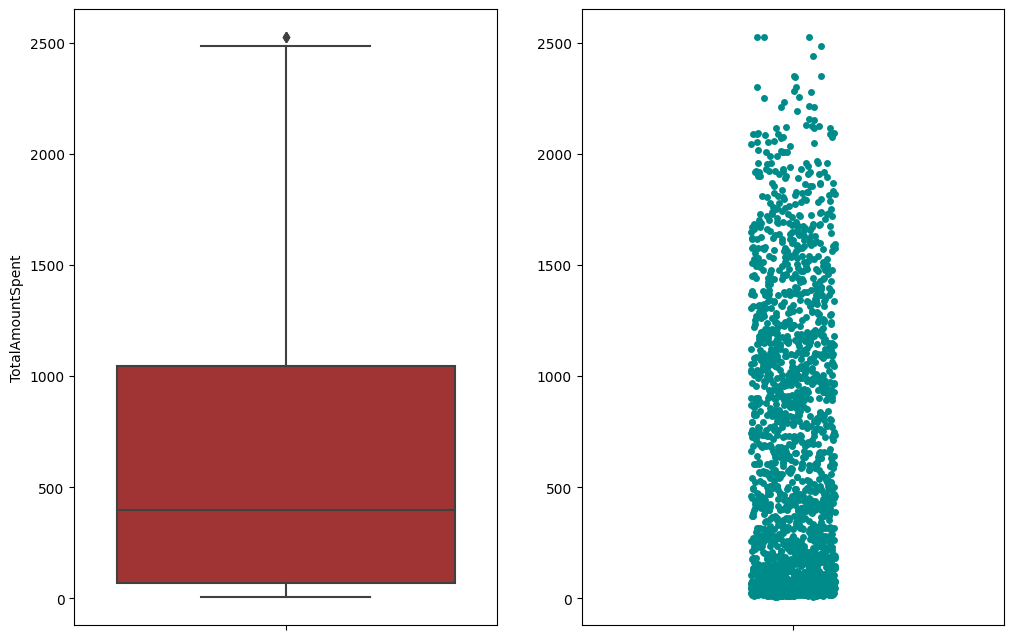

In [ ]:
plot_num(products, 'TotalAmountSpent')

In [ ]:
products.MntWines = products.MntWines/products['TotalAmountSpent']
products.MntSweetProducts = products.MntSweetProducts/products['TotalAmountSpent']
products.MntMeatProducts = products.MntMeatProducts/products['TotalAmountSpent']
products.MntGoldProds = products.MntGoldProds/products['TotalAmountSpent']
products.MntFruits =  products.MntFruits/products['TotalAmountSpent']
products.MntFishProducts = products.MntFishProducts/products['TotalAmountSpent']

In [ ]:
products.describe()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.458481,0.049505,0.249508,0.071532,0.050777,0.120196,605.798214
std,3246.662198,0.228411,0.055867,0.126633,0.077909,0.061184,0.108988,602.249288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,0.289506,0.008924,0.156250,0.012571,0.008621,0.038095,68.750000
50%,5458.500000,0.457482,0.029840,0.233447,0.048193,0.033333,0.086294,396.000000
75%,8427.750000,0.639143,0.070237,0.328227,0.104703,0.070411,0.169768,1045.500000
max,11191.000000,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150,2525.000000


Promotion

In [ ]:
promotion = df[['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']]

In [ ]:
promotion.head()

,ID,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,0,0,0,0,0,1
1,2174,0,0,0,0,0,0
2,4141,0,0,0,0,0,0
3,6182,0,0,0,0,0,0
4,5324,0,0,0,0,0,0


In [ ]:
show_null(promotion)

,#,% null,type
ID,0,0.0,int64
AcceptedCmp3,0,0.0,int64
AcceptedCmp4,0,0.0,int64
AcceptedCmp5,0,0.0,int64
AcceptedCmp1,0,0.0,int64
AcceptedCmp2,0,0.0,int64
Response,0,0.0,int64


In [ ]:
promotion['AcceptedCap'] = promotion.AcceptedCmp3 + promotion.AcceptedCmp4 \
 + promotion.AcceptedCmp5 + promotion.AcceptedCmp1 + promotion.AcceptedCmp2 + promotion.Response

In [ ]:
promotion['AcceptedCap'].describe()

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: AcceptedCap, dtype: float64

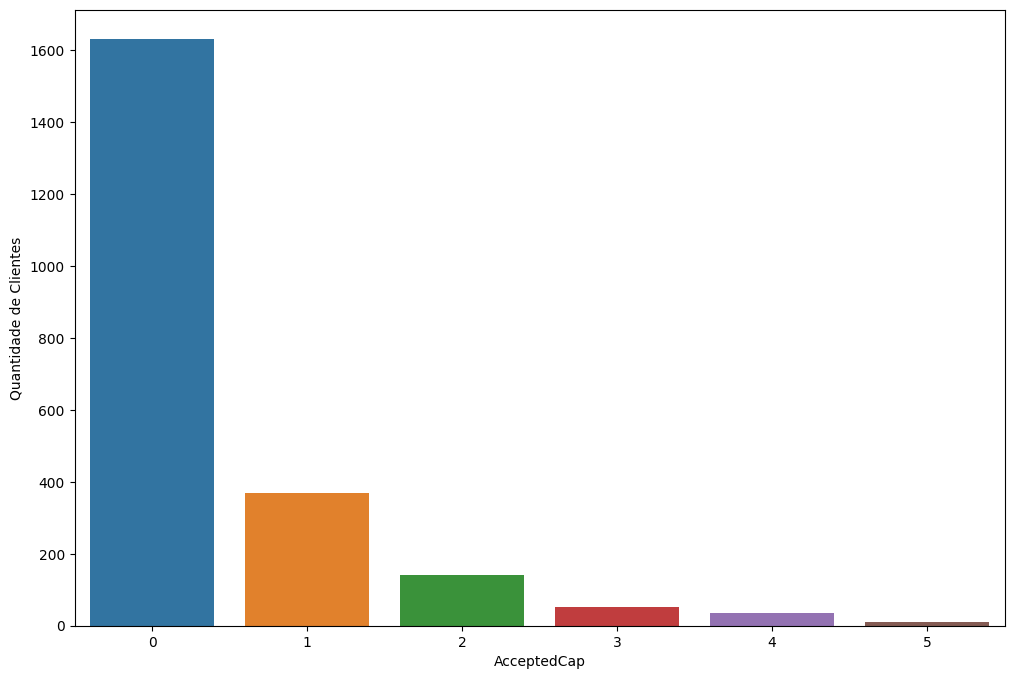

In [ ]:
plot_cat(promotion, 'AcceptedCap')

In [ ]:
promotion = promotion[['ID', 'AcceptedCap']]

In [ ]:
promotion.head()

,ID,AcceptedCap
0,5524,1
1,2174,0
2,4141,0
3,6182,0
4,5324,0


Place

In [ ]:
place = df[['ID', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']]

In [ ]:
place.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth
0,5524,8,10,4,3,7
1,2174,1,1,2,2,5
2,4141,8,2,10,1,4
3,6182,2,0,4,2,6
4,5324,5,3,6,5,5


In [ ]:
show_null(place)

,#,% null,type
ID,0,0.0,int64
NumWebPurchases,0,0.0,int64
NumCatalogPurchases,0,0.0,int64
NumStorePurchases,0,0.0,int64
NumDealsPurchases,0,0.0,int64
NumWebVisitsMonth,0,0.0,int64


In [ ]:
place['TotalPurchases'] = place.NumWebPurchases + place.NumCatalogPurchases + \
place.NumStorePurchases + place.NumDealsPurchases + place.NumWebVisitsMonth

In [ ]:
place['TotalPurchases'].describe()

count    2240.000000
mean       20.178571
std         7.293275
min         0.000000
25%        14.000000
50%        19.000000
75%        25.000000
max        46.000000
Name: TotalPurchases, dtype: float64

In [ ]:
place[place.TotalPurchases == 0]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
655,5555,0,0,0,0,0,0
2132,11181,0,0,0,0,0,0


In [ ]:
place = place[place['TotalPurchases']>0]

In [ ]:
place.NumWebPurchases = place.NumWebPurchases/place['TotalPurchases']
place.NumCatalogPurchases = place.NumCatalogPurchases/place['TotalPurchases']
place.NumStorePurchases = place.NumStorePurchases/place['TotalPurchases']
place.NumDealsPurchases = place.NumDealsPurchases/place['TotalPurchases']
place.NumWebVisitsMonth =  place.NumWebVisitsMonth/place['TotalPurchases']


In [ ]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000
mean,5589.679178,0.186230,0.114601,0.281394,0.114470,0.303305,20.196604
std,3245.962070,0.084361,0.114214,0.104247,0.067450,0.178475,7.271523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2826.750000,0.130435,0.000000,0.200000,0.062500,0.153846,14.000000
50%,5454.500000,0.181818,0.083333,0.257604,0.100000,0.272727,19.000000
75%,8425.250000,0.238095,0.181818,0.351351,0.153846,0.444444,25.000000
max,11191.000000,0.964286,0.965517,1.000000,0.441176,1.000000,46.000000


In [ ]:
place[place.NumDealsPurchases > 1]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases


In [ ]:
place = place[place['NumDealsPurchases'] <= 1]

Var NumWebPurchases

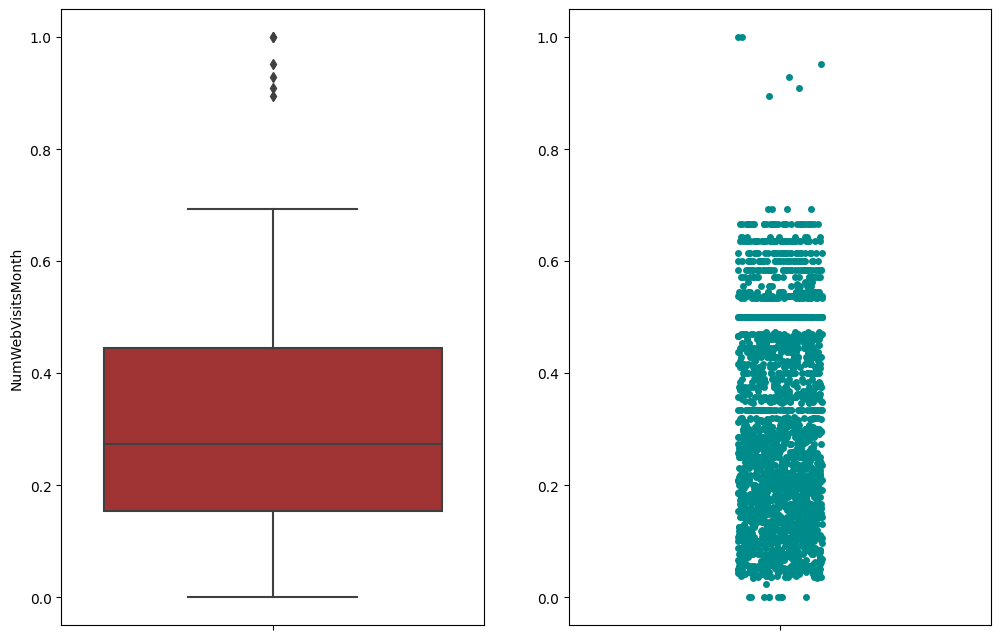

In [ ]:
plot_num(place, 'NumWebVisitsMonth')

Juntando todos os dados

In [ ]:
df_lista = [people, products, promotion, place]

In [ ]:
df_final = reduce(lambda df1, df2: pd.merge(df1, df2, on='ID'), df_lista)

In [ ]:
df_final.shape

(2203, 26)

In [ ]:
df_final.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Recency',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'ChildrenHome', 'LifeTime', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'TotalAmountSpent', 'AcceptedCap', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'TotalPurchases'],
      dtype='object')

In [ ]:
df_final.drop(columns=['ID'], inplace=True)

# Normalização

In [ ]:
def scaler(df):
  df2 = df.copy()
  for column in df2:
    minimo = df2[column].min()
    maximo = df2[column].max()
    df2[column] = (df[column] - minimo) /(maximo - minimo)
    return df2

In [ ]:
scaler_df = scaler(df_final)

In [ ]:
scaler_df.describe()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,...,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCap,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,...,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,0.516163,2.458012,51860.680436,49.052202,0.104403,0.388561,0.213345,0.259192,0.034498,0.948252,...,0.050742,0.119823,607.925556,0.448025,0.186147,0.114855,0.281529,0.114223,0.303246,20.225148
std,0.208799,1.003822,21327.199503,28.937929,0.305852,0.487534,0.409763,0.438291,0.182547,0.749235,...,0.060935,0.108830,602.969746,0.892190,0.082850,0.114079,0.103180,0.067321,0.178354,7.261257
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.339286,2.000000,35196.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008640,0.038019,69.000000,0.000000,0.133333,0.000000,0.200000,0.062500,0.153846,14.000000
50%,0.535714,2.000000,51369.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.033333,0.084615,397.000000,0.000000,0.181818,0.083333,0.259259,0.100000,0.272727,19.000000
75%,0.660714,3.000000,68474.500000,74.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.070510,0.169569,1048.000000,1.000000,0.238095,0.181818,0.352941,0.153846,0.444444,25.000000
max,1.000000,4.000000,162397.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,0.945848,0.894150,2525.000000,5.000000,0.964286,0.965517,0.666667,0.441176,1.000000,46.000000


# Metodo de Elbow

In [ ]:
inertia = []
num_clusters = range(1, 14) #aqui usei de 1 a 13 clusters

for k in num_clusters:
  Model = KMeans(n_clusters=k)#pega de 1 a 14 do range e constroi o gráfico
  Model.fit(scaler_df) #fazendo o treinamento do meu df acima
  inertia.append(Model.inertia_) #será adicionado ao inertia o novo valor 

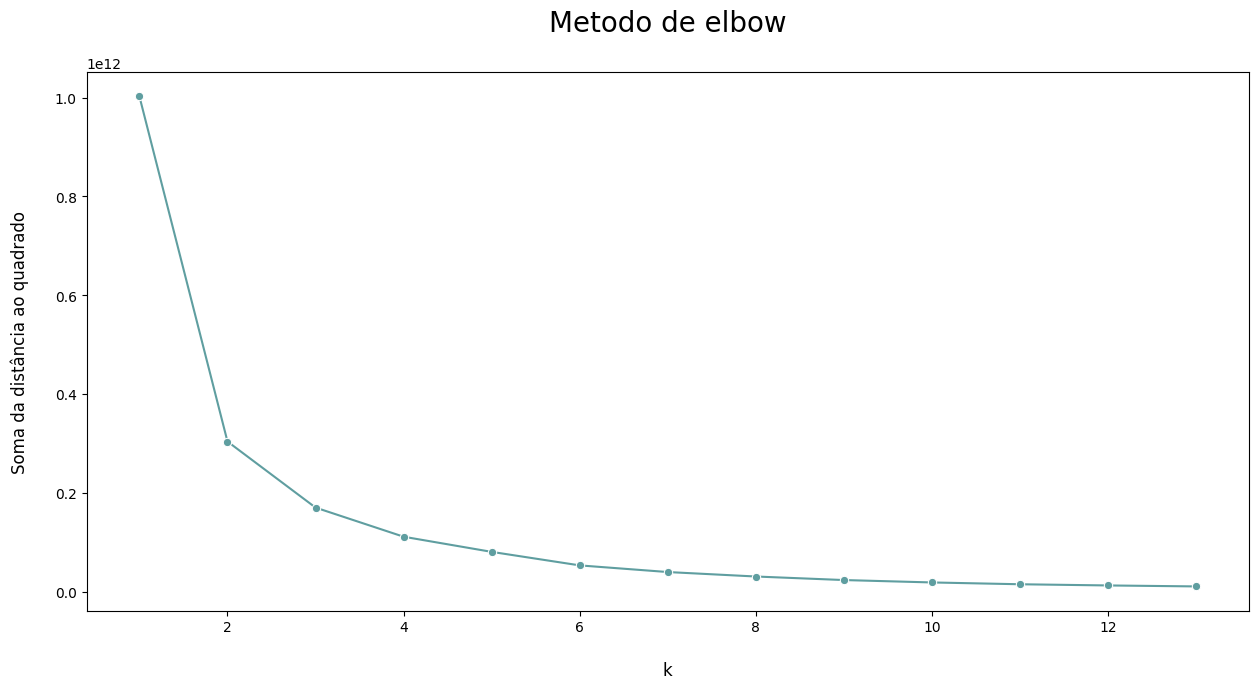

In [ ]:
plt.figure(figsize=(15,7)) #plotando o grafico
sns.lineplot(x=num_clusters, y=inertia, color='cadetblue', marker='o') #eixo x os cluster e eixo y os centroids(inertia)
plt.xlabel('\nk', size=12)
plt.ylabel('Soma da distância ao quadrado\n', size=12)
plt.title('Metodo de elbow\n', size=20)
plt.show()

No elbow(cutuvelo) iremos usar 4 clusters

# Alocação de pesos

> quais as variaveis que terá mais peso na alocação de clusters



In [ ]:
scaler_df.columns

Index(['Year_Birth', 'Education', 'Income', 'Recency',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'ChildrenHome', 'LifeTime', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'TotalAmountSpent', 'AcceptedCap', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'TotalPurchases'],
      dtype='object')

In [ ]:
scaler_df.TotalAmountSpent = 8*scaler_df.TotalAmountSpent #no exemplo acima o maior peso para clusterização será este
scaler_df.TotalPurchases = 6*scaler_df.TotalPurchases
scaler_df.Recency = 4*scaler_df.Recency
scaler_df.NumWebVisitsMonth = 4*scaler_df.NumWebVisitsMonth
scaler_df.Income = 4*scaler_df.Income
scaler_df.LifeTime = 4*scaler_df.LifeTime
scaler_df.Year_Birth = 2*scaler_df.Year_Birth
scaler_df.ChildrenHome = 2*scaler_df.ChildrenHome
scaler_df.Education = 2*scaler_df.Education

# Implementando KMEANS

In [ ]:
Model = KMeans(n_clusters=4)

In [ ]:
clusters = Model.fit_predict(scaler_df)

In [ ]:
clusters

array([3, 2, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
df_final['cluster'] = clusters

In [ ]:
df_final

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,...,MntGoldProds,TotalAmountSpent,AcceptedCap,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,cluster
0,1957,2,58138.0,58,0,0,1,0,0,0,...,0.054422,1617,1,0.250000,0.312500,0.125000,0.093750,0.218750,32,3
1,1954,2,46344.0,38,0,0,1,0,0,2,...,0.222222,27,0,0.090909,0.090909,0.181818,0.181818,0.454545,11,2
2,1965,2,71613.0,26,0,0,0,1,0,0,...,0.054124,776,0,0.320000,0.080000,0.400000,0.040000,0.160000,25,3
3,1984,2,26646.0,26,0,0,0,1,0,1,...,0.094340,53,0,0.142857,0.000000,0.285714,0.142857,0.428571,14,1
4,1981,4,58293.0,94,0,1,0,0,0,1,...,0.035545,422,0,0.208333,0.125000,0.250000,0.208333,0.208333,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,1967,2,61223.0,46,0,1,0,0,0,1,...,0.184191,1341,0,0.391304,0.130435,0.173913,0.086957,0.217391,23,3
2199,1946,4,64014.0,56,0,0,0,1,0,3,...,0.018018,444,1,0.275862,0.068966,0.172414,0.241379,0.241379,29,3
2200,1981,2,56981.0,91,1,0,0,0,0,0,...,0.019339,1241,1,0.080000,0.120000,0.520000,0.040000,0.240000,25,3
2201,1956,3,69245.0,8,0,0,0,1,0,1,...,0.072361,843,0,0.230769,0.192308,0.384615,0.076923,0.115385,26,3


# Salvando o modelo

In [ ]:
#filename = 'modelo_finalizado.sav'
#pickle.dump(Model, open(filename, 'wb'))

# Upload modelo

In [ ]:
#Model = pickle.load(open(filename, 'rb'))

# Analise de clusters

In [ ]:
df_final.cluster.value_counts()

2    671
3    660
1    460
0    412
Name: cluster, dtype: int64

In [ ]:
df_final.groupby('cluster').mean()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,...,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCap,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
cluster,,,,,,,,,,,,,,,,,,,,,
0,1967.803398,2.536408,82125.310680,49.614078,0.092233,0.378641,0.230583,0.259709,0.038835,0.315534,...,0.052402,0.053690,1425.742718,1.201456,0.222499,0.255825,0.355110,0.053401,0.113166,23.657767
1,1974.460870,1.969565,23381.952174,48.269565,0.091304,0.393478,0.241304,0.256522,0.017391,0.986957,...,0.083450,0.216914,76.086957,0.186957,0.127110,0.027842,0.210493,0.132816,0.501739,14.463043
2,1968.548435,2.596125,42178.552906,49.657228,0.108793,0.371088,0.222057,0.260805,0.037258,1.327869,...,0.036474,0.135506,223.140089,0.253353,0.168752,0.054757,0.240297,0.143268,0.392926,17.564829
3,1966.083333,2.609091,62660.521212,48.631818,0.116667,0.409091,0.174242,0.259091,0.040909,0.930303,...,0.041416,0.077493,859.283333,0.357576,0.222288,0.148600,0.327026,0.109703,0.192384,24.803030


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_final.groupby('cluster').mean()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCap,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,1967.803398,2.536408,82125.310680,49.614078,0.092233,0.378641,0.230583,0.259709,0.038835,0.315534,14.357201,0.453452,0.047581,0.325773,0.067102,0.052402,0.053690,1425.742718,1.201456,0.222499,0.255825,0.355110,0.053401,0.113166,23.657767
1,1974.460870,1.969565,23381.952174,48.269565,0.091304,0.393478,0.241304,0.256522,0.017391,0.986957,15.342319,0.248080,0.080726,0.249340,0.121489,0.083450,0.216914,76.086957,0.186957,0.127110,0.027842,0.210493,0.132816,0.501739,14.463043
2,1968.548435,2.596125,42178.552906,49.657228,0.108793,0.371088,0.222057,0.260805,0.037258,1.327869,14.809389,0.505769,0.037264,0.229230,0.055757,0.036474,0.135506,223.140089,0.253353,0.168752,0.054757,0.240297,0.143268,0.392926,17.564829
3,1966.083333,2.609091,62660.521212,48.631818,0.116667,0.409091,0.174242,0.259091,0.040909,0.930303,15.557677,0.562553,0.041113,0.222103,0.055322,0.041416,0.077493,859.283333,0.357576,0.222288,0.148600,0.327026,0.109703,0.192384,24.803030




> Cluster 0 é o grupo de mais alto valor com menor numero de clientes pois possui maior renda e que mais compram



